In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [5]:
path= 'C:/Users/hmdebern.UTMB-USERS-M/Desktop/test day hour/4_25_2022_day/'
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            
        
# data=data.drop(columns=["new_Median","new_sd","gumbel_Median","gumbel _sd"])

In [6]:
data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])

In [7]:
print(data.shape)
print(data.columns)

(32620, 11)
Index(['proteinName', 'peptideSeq', 'old_Rsquared', 'new_Rsquared', 'NDP',
       'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'Protein'],
      dtype='object')


In [8]:
data=data[data.NDP >=4]
print(data.shape)

(29723, 11)


In [9]:
data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])

## Rsquared >= 90

In [10]:
data[data.old_Rsquared>=0.9].shape[0]/data.shape[0]

0.23298455741345087

In [11]:
data[data.new_Rsquared>=0.9].shape[0]/data.shape[0]

0.45860108333613697

## Rsquared >= 95

In [12]:
data[data.old_Rsquared>=0.95].shape[0]/data.shape[0]

0.12683780237526496

In [13]:
data[data.new_Rsquared>=0.95].shape[0]/data.shape[0]

0.3319987888167412

## Rsquared >= 80

In [14]:
data[data.old_Rsquared>=0.8].shape[0]/data.shape[0]

0.3419574067220671

In [15]:
data[data.new_Rsquared>=0.8].shape[0]/data.shape[0]

0.5849342260202537

In [16]:
conditions = [
    (data.old_Rsquared < 0.80)  ,
    (data.old_Rsquared >= 0.80) & (data.old_Rsquared < 0.90),
    (data.old_Rsquared >= 0.90) & (data.old_Rsquared < 0.95),
    (data.old_Rsquared >=0.95)]
choices = ["< 80", "80 =< x < 90", "90 =< x < 95", ">=95"]
data['old_class'] = np.select(conditions, choices, default=0)

conditions = [
    (data.new_Rsquared < 0.80)  ,
    (data.new_Rsquared >= 0.80) & (data.new_Rsquared < 0.90),
    (data.new_Rsquared >= 0.90) & (data.new_Rsquared < 0.95),
    (data.new_Rsquared >=0.95)]
choices = ["< 80", "80 =< x < 90", "90 =< x < 95", ">=95"]
data['new_class'] = np.select(conditions, choices, default=0)

In [17]:
data.head()

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class
0,1433B_MOUSE,DSTLImQLLR,0.405407,0.842207,8,0.63353,0.500928,1.913215e+07,603.33154,0.109762,1433B_MOUSE,0.436800,< 80,80 =< x < 90
1,1433B_MOUSE,AVTEQGHELSNEER,-0.515961,-0.132980,7,0.47244,0.510142,4.919352e+07,533.58502,0.241501,1433B_MOUSE,0.382982,< 80,< 80
2,1433B_MOUSE,LAEQAERYDDMAAAMK,-0.067008,0.388974,5,0.13982,0.087811,1.312825e+08,906.91638,0.086949,1433B_MOUSE,0.455982,< 80,< 80
3,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.937993,0.978693,8,0.39895,0.039049,1.747170e+07,1080.00488,0.016933,1433B_MOUSE,0.040700,90 =< x < 95,>=95
4,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.636834,0.973459,9,0.27219,0.065604,2.121646e+07,720.33905,0.047914,1433B_MOUSE,0.336625,< 80,>=95


In [18]:
data=data[data.old_class!='0']
data=data[data.new_class!='0']

In [19]:
print(data.groupby(['old_class'])['old_class'].count())

old_class
80 =< x < 90     3239
90 =< x < 95     3155
< 80            19549
>=95             3770
Name: old_class, dtype: int64


<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='old_class'>

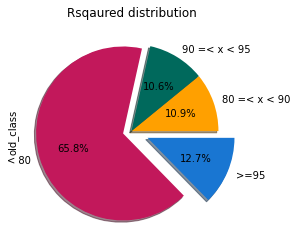

In [20]:
data.groupby(['old_class'])['old_class'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0,0,0.1, 0.2), 
                                                      colors = ['#FFA000','#00695C','#C2185B', '#1976D2'],
                                title='Rsqaured distribution')

In [21]:
data.groupby(['new_class'])['new_class'].count()

new_class
80 =< x < 90     3755
90 =< x < 95     3763
< 80            12327
>=95             9868
Name: new_class, dtype: int64

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='new_class'>

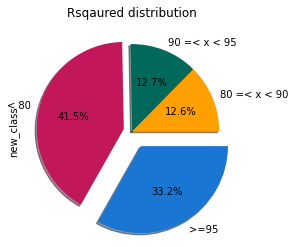

In [22]:
data.groupby(['new_class'])['new_class'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0,0,0.1, 0.2), 
                                                      colors = ['#FFA000','#00695C','#C2185B', '#1976D2'],
                                title='Rsqaured distribution')

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='g80_old'>

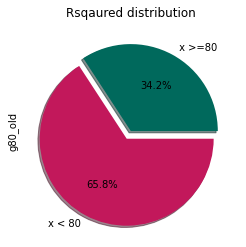

In [23]:
conditions = [
    (data.old_Rsquared < 0.80),
    (data.old_Rsquared >=0.8)]
choices = ["x < 80", " x >=80 "]
data['g80_old'] = np.select(conditions, choices, default=0)
data.groupby(['g80_old'])['g80_old'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0, 0.1), 
                                                      colors = ['#00695C', '#C2185B'],
                                title='Rsqaured distribution')

<AxesSubplot:title={'center':'Rsqaured distribution'}, ylabel='g80_new'>

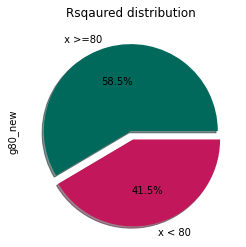

In [24]:
conditions = [
    (data.new_Rsquared < 0.80),
    (data.new_Rsquared >=0.8)]
choices = ["x < 80", " x >=80 "]
data['g80_new'] = np.select(conditions, choices, default=0)
data.groupby(['g80_new'])['g80_new'].count().plot(kind='pie', y='Rsqaured distribution',shadow=True,
                                                      autopct='%1.1f%%',explode=(0, 0.1), 
                                                      colors = ['#00695C', '#C2185B'],
                                title='Rsqaured distribution')

In [25]:
pd.DataFrame(data.groupby(['new_class'])['new_class'].count())

,new_class
new_class,
80 =< x < 90,3755
90 =< x < 95,3763
< 80,12327
>=95,9868


In [26]:
list(data.groupby(['new_class'])['new_class'].count())

[3755, 3763, 12327, 9868]

In [27]:
list((data.groupby(['old_class'])['old_class'].count()))

[3239, 3155, 19549, 3770]

<AxesSubplot:>

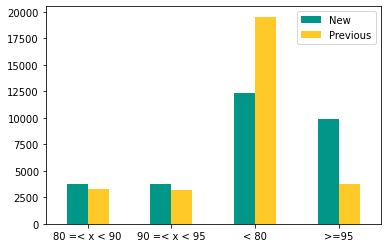

In [28]:
dataforbarchart= pd.DataFrame()
dataforbarchart["New"]=list(data.groupby(['new_class'])['new_class'].count())
dataforbarchart["Previous"]=list(data.groupby(['old_class'])['old_class'].count())
dataforbarchart.index=["80 =< x < 90","90 =< x < 95","< 80",">=95"]
dataforbarchart.plot.bar(rot=0,color = ['#009688', '#FFCA28'])

<AxesSubplot:>

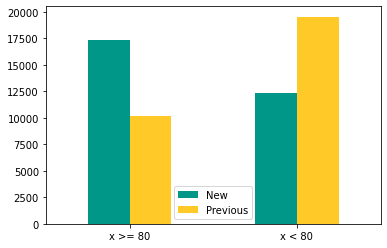

In [29]:
dataforbarchart2= pd.DataFrame()
dataforbarchart2["New"]=list(data.groupby(['g80_new'])['g80_new'].count())
dataforbarchart2["Previous"]=list(data.groupby(['g80_old'])['g80_old'].count())
dataforbarchart2.index=["x >= 80","x < 80"]
dataforbarchart2.plot.bar(rot=0,color = ['#009688', '#FFCA28'])

Text(0, 0.5, 'New Rsquared')

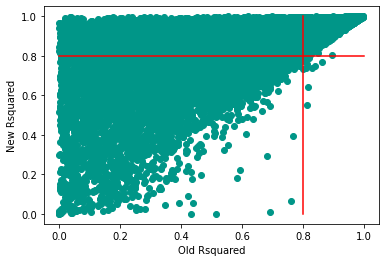

In [30]:
temp_data=data[ (data.old_Rsquared>0) & (data.new_Rsquared>0)]
plt.scatter(temp_data.old_Rsquared,temp_data.new_Rsquared,c='#009688')
plt.plot(range(0,len(temp_data.shape)),[0.8]*len(temp_data.shape),c='r')
plt.plot([0.8]*len(temp_data.shape),range(0,len(temp_data.shape)),c='r')
plt.xlabel('Old Rsquared')
plt.ylabel('New Rsquared')

In [31]:
data[data['old_class']=='0'].head(40)

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class,g80_old,g80_new


In [32]:
data[data['new_class']=='0'].head(10)

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,Protein,diff,old_class,new_class,g80_old,g80_new


In [22]:
data[data.old_Rsquared>data.new_Rsquared].shape[0]/data.shape[0]

0.11288701246481705

In [23]:
data[data.old_Rsquared<data.new_Rsquared].shape[0]/data.shape[0]

0.8801099048384935

In [24]:
data[data.old_Rsquared==data.new_Rsquared].shape[0]/data.shape[0]

0.005394719206540678

In [25]:
# data[data.old_Rsquared>data.new_Rsquared].head()

In [26]:
data.describe()

,old_Rsquared,new_Rsquared,NDP,diff
count,29832.000000,29796.000000,29844.000000,29796.000000
mean,0.271778,-17.158329,7.702955,18.106122
std,2.871327,1401.554392,1.591386,1401.529960
min,-253.416880,-232679.020598,4.000000,0.000000
25%,0.002247,0.569054,7.000000,0.042881
50%,0.641281,0.902348,8.000000,0.153032
75%,0.908426,0.974556,9.000000,0.461520
max,0.998978,0.999937,9.000000,232678.279825


In [27]:
data[data.new_Rsquared < -4447]

,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,Protein,diff,old_class,new_class
41,ACSF2_MOUSE,LVLPSPLYHcLGSVGGTMVSMMHGATLLLSSPSFNGK,0.025025,-7442.765432,6,ACSF2_MOUSE,7442.790457,< 80,< 80
37,ACSM1_MOUSE,WNDHDSPEEFNFASDVLDYWAQMEEEGKR,0.109525,-5402.417926,5,ACSM1_MOUSE,5402.527451,< 80,< 80
11,ACSM3_MOUSE,ILDENGATLPPGQEGDIALQVLPERPFGLFTHYVDNPSK,-0.141559,-26161.740715,9,ACSM3_MOUSE,26161.599156,< 80,< 80
12,AL4A1_MOUSE,NFHFVHSSADVDSVVSGTLR,-0.261596,-7872.616733,9,AL4A1_MOUSE,7872.355138,< 80,< 80
15,AMPN_MOUSE,SDQIALPDFNAGAMENWGLVTYR,0.056955,-42532.479404,7,AMPN_MOUSE,42532.536358,< 80,< 80
0,AP4A_MOUSE,MDNSTIEFLLLQASDGIHHWTPPK,-0.740773,-232679.020598,4,AP4A_MOUSE,232678.279825,< 80,< 80
9,FAHD2_MOUSE,LVQFQAPHLEEPHLGLESGVGGGVVDLNAFDSTLPK,0.006713,-19948.712201,5,FAHD2_MOUSE,19948.718914,< 80,< 80
26,PLST_MOUSE,DKTISSSLAVVDLIDAIQPGcINYDLVK,-0.248848,-5340.183677,9,PLST_MOUSE,5339.934829,< 80,< 80
17,PSMD3_MOUSE,ELDTVTLEDIKEHVR,-4.404583,-21755.703101,5,PSMD3_MOUSE,21751.298518,< 80,< 80
7,RTN4_MOUSE,SPAASAPSLPPAAAVLPSKLPEDDEPPARPPAPAGASPLAEPAAPP...,-3.232864,-20386.209021,4,RTN4_MOUSE,20382.976158,< 80,< 80


In [28]:
min(data.new_Rsquared)

-232679.020597554

In [29]:
from sklearn import metrics
import scipy
import numpy as np

In [30]:
yexp=[0.3427750932611498,0.08094025327769315,0.0928883800839536,0.066779723942465827,
0.047197637792798015,0.070799860702632791,0.0728408749994044,0.14940929381691573,
0.10398864451878329]

In [31]:
yth=[
    0.33043999999999996,0.12954042528342788,0.12951103393282412,0.12951102963290714,0.12951102963227806,
0.12951102963227798,0.12951102963227798,0.12951102963227798,0.12951102963227798
]

In [32]:
yse=[
    0.329680705305766,0.091174415410932658,0.095798190649067416,0.066779723942465827,0.048507447570481546,0.070799860702632791,
0.0728408749994044,0.12847444738471661,0.10815684266593953]

In [33]:
metrics.r2_score(yth,yexp)

0.3793588165235331

In [34]:
metrics.r2_score(yth,yse)

0.4364974709815369

In [35]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2


In [36]:
rsquared(yth,yexp)

0.8977485861904252

In [37]:
rsquared(yth,yse)

0.9203614191336668

In [38]:
np.mean(yse)

0.11246805651460076